# Parabolic SAR for my portfolio

In [51]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [52]:
import datetime
import os
import time

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

from modules.psar_conventional import ParabolicSAR

In [53]:
file_excel = "portfolio.xlsm"
df_portfolio = pd.read_excel(file_excel, sheet_name="Portfolio")
df_portfolio

,銘柄コード,銘柄名称,口座区分,保有数量,発注数量,平均取得価額,時価,前日比,前日比率,時価評価額,評価損益額,評価損益率,銘柄情報等,JAX時価,JNX時価,Chi-X時価,PER,PBR,配当利回り
0,2354,ＹＥＤＩＧＩＴＡＬ,特定,100,0,670,652,4,0.62,65200,-1800,-2.686567,-,650.8,653.3,652.8,10.1,1.75,3.06
1,2776,新都ホールディングス,特定,100,0,151,147,0,0,14700,-400,-2.649007,-,146.1,146.1,146.9,98,4.01,0
2,3010,ポラリス・ホールディングス,特定,100,0,218,218,-1,-0.46,21800,0,0,決算,218.4,217.3,218,25.34,1.79,1.38
3,3660,アイスタイル,特定,100,0,560,574,30,5.51,57400,1400,2.5,決算,573.1,572.9,573.7,24.32,3.79,0.17
4,4222,児玉化学,特定,100,0,600,592,34,6.09,59200,-800,-1.333333,-,591.3,593.7,591.1,0.46,2.27,0
5,4344,ソースネクスト,特定,100,0,180,184,3,1.66,18400,400,2.222222,決算,184.8,184.4,184.2,0,3.4,0
6,4552,ＪＣＲファーマ,特定,100,0,595,593,75,14.48,59300,-200,-0.336134,決算,593.9,593.8,593.7,24.1,1.53,3.37
7,4891,ティムス,特定,100,0,169,173,7,4.22,17300,400,2.366864,決算,171,172.2,171.9,0,2.49,0
8,5016,ＪＸ金属,特定,100,0,780,832,8.1,0.98,83200,5200,6.666667,決算,831.9,832.9,830.7,13.29,1.25,1.8
9,6572,オープングループ,特定,100,0,363,365,-1,-0.27,36500,200,0.550964,決算,366,364.1,366.1,41.01,1.83,1.23


In [54]:
df_portfolio.columns

Index(['銘柄コード ', '銘柄名称', '口座区分', '保有数量', '発注数量', '平均取得価額', '時価', '前日比', '前日比率',
       '時価評価額', '評価損益額', '評価損益率', '銘柄情報等', 'JAX時価', 'JNX時価', 'Chi-X時価', 'PER',
       'PBR', '配当利回り'],
      dtype='object')

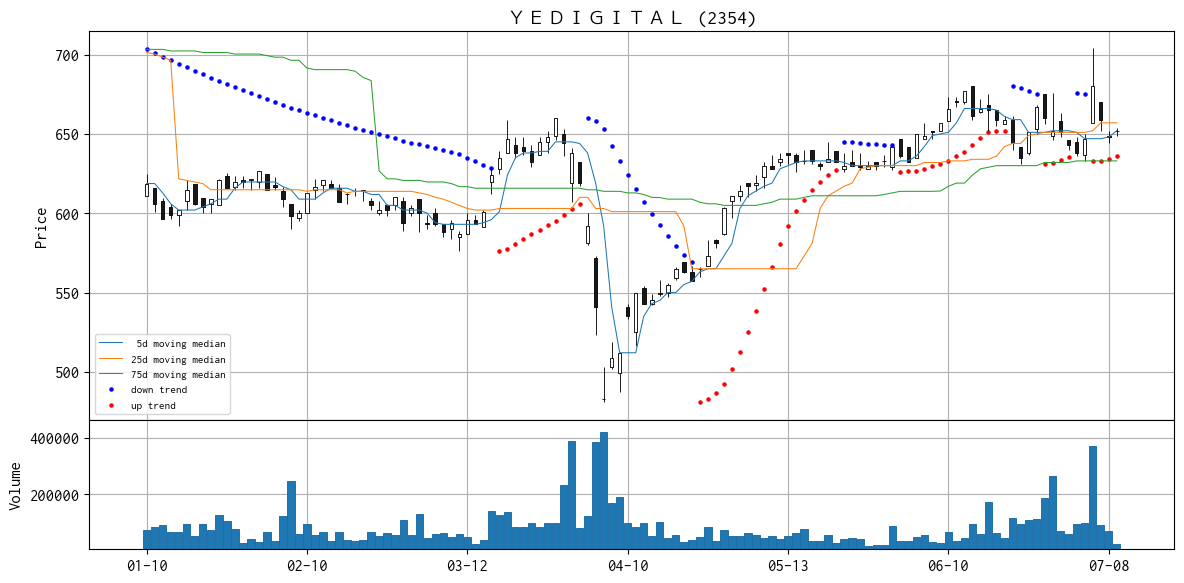

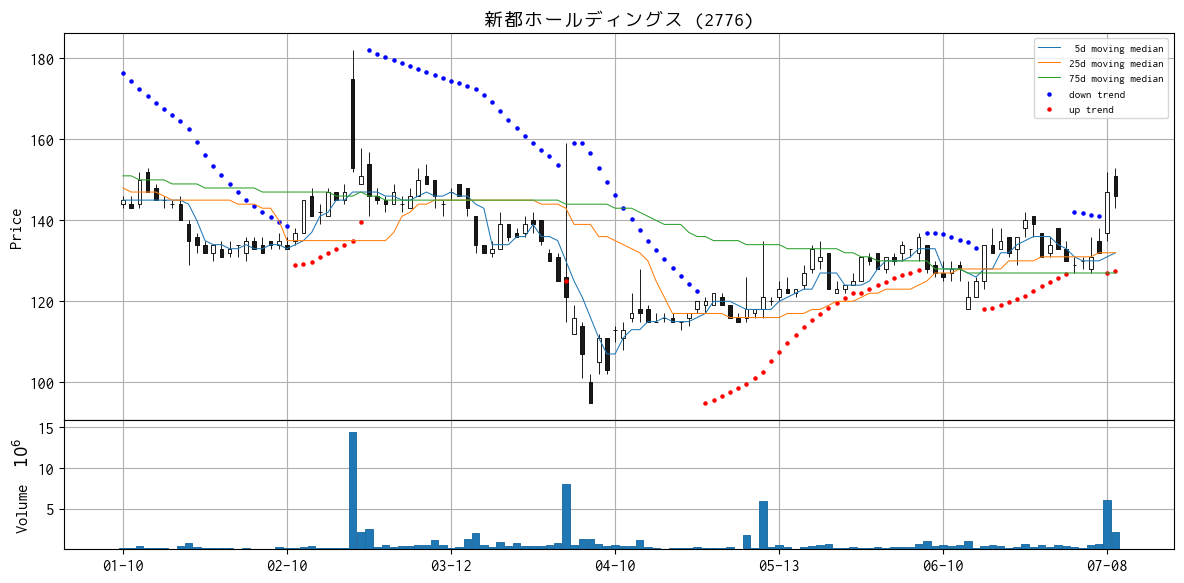

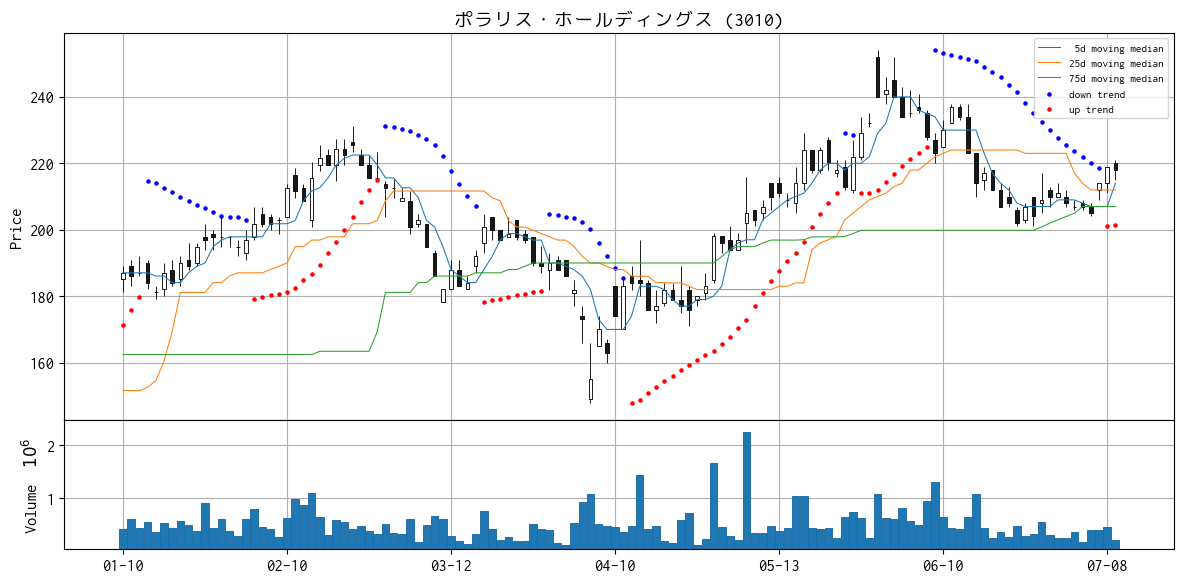

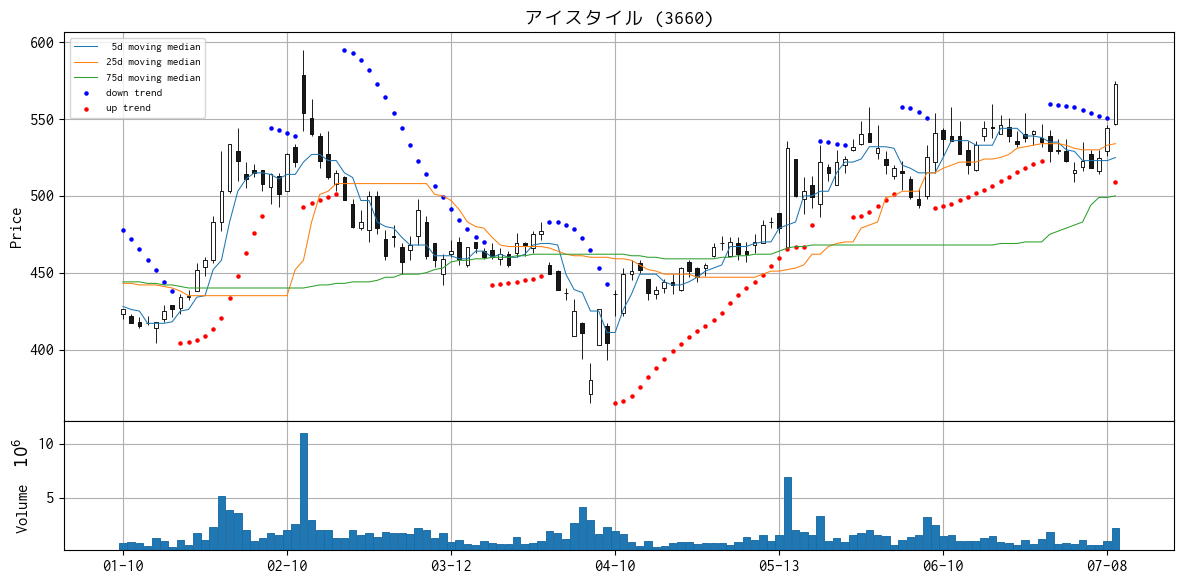

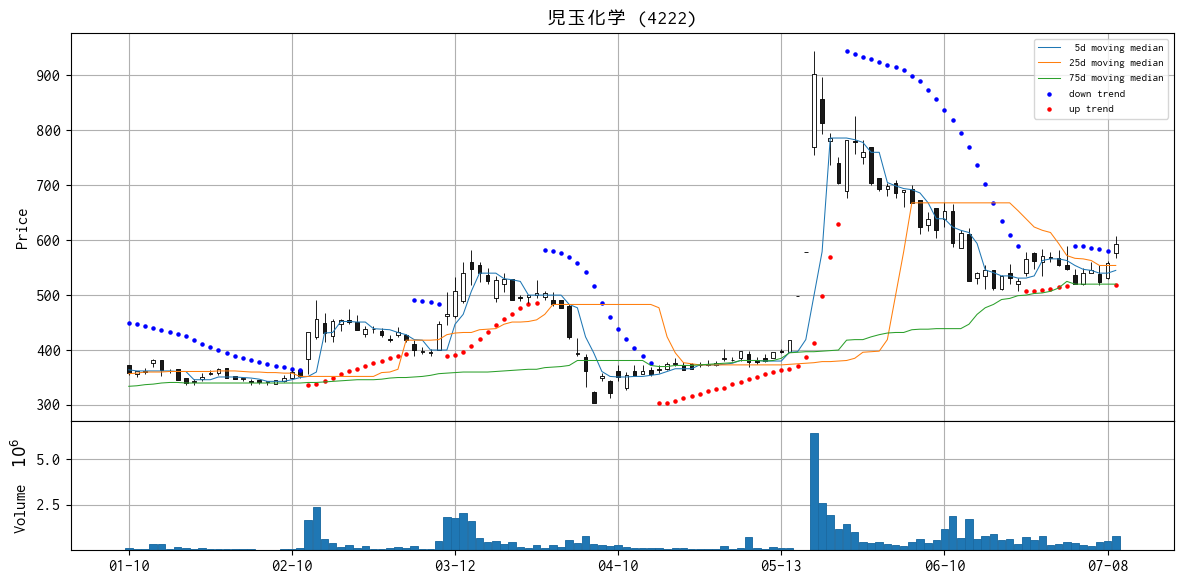

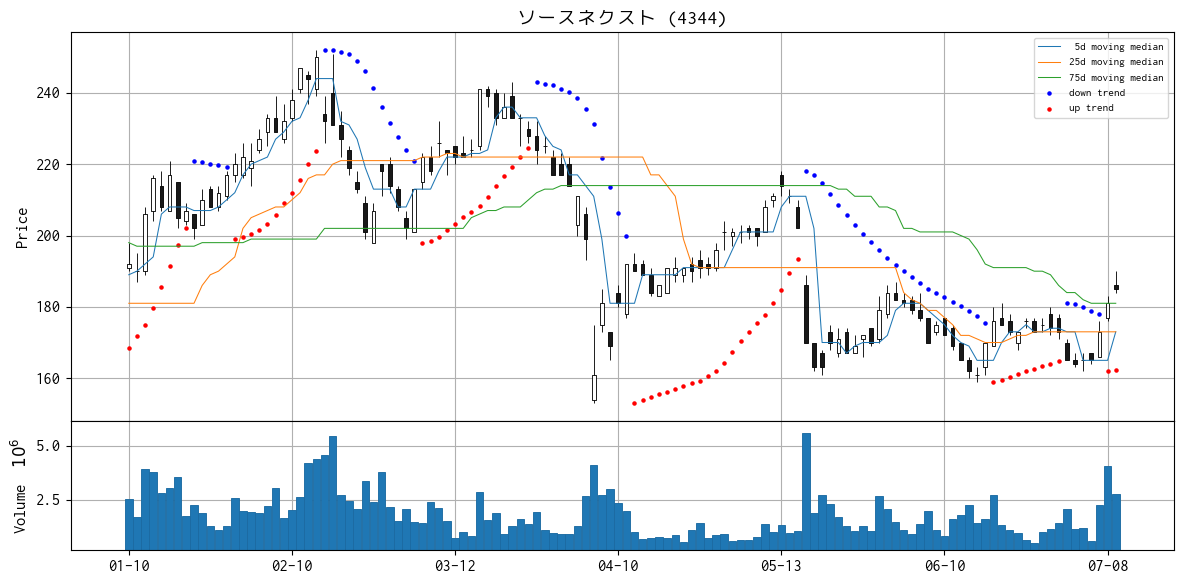

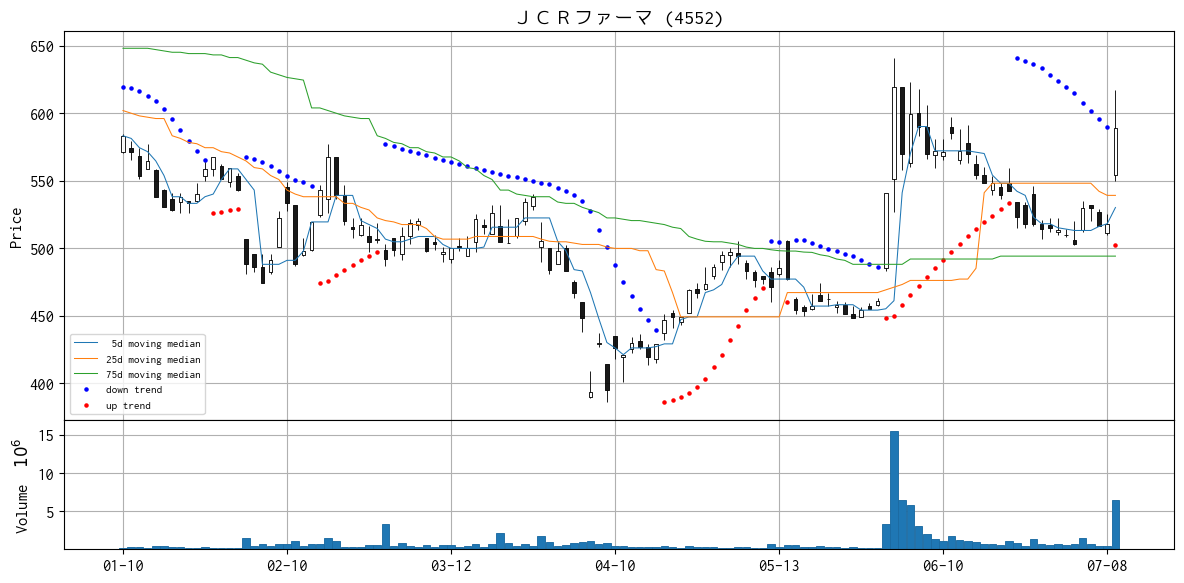

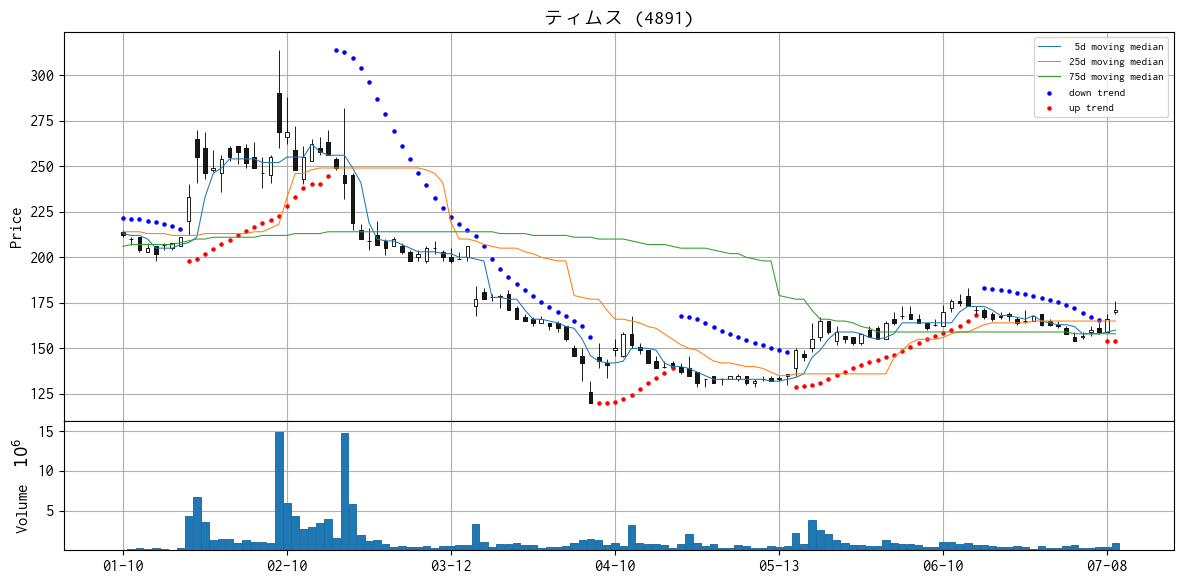

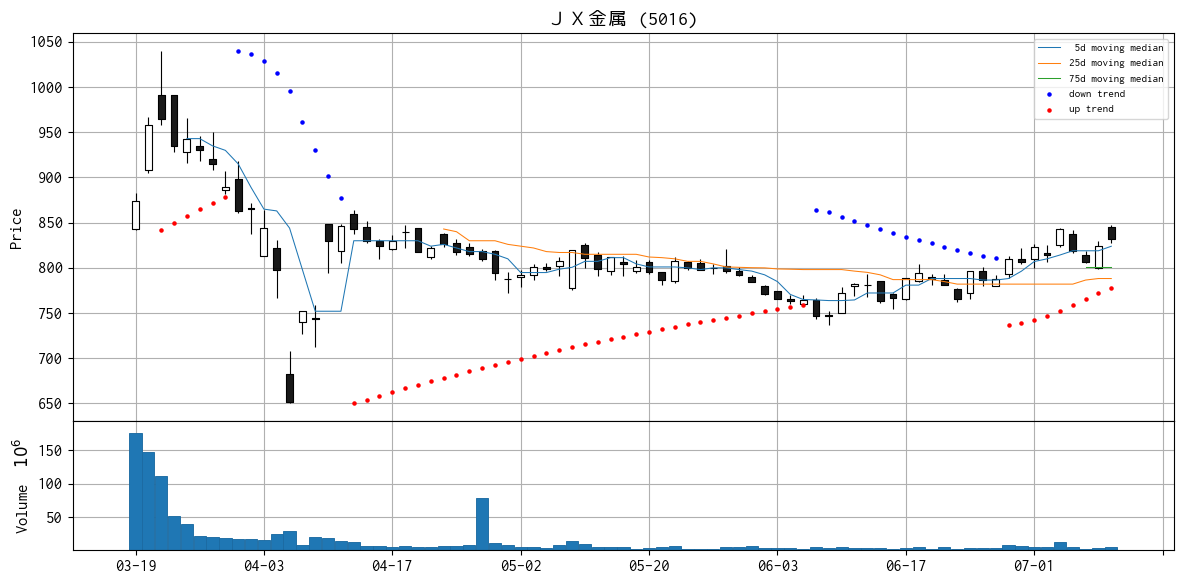

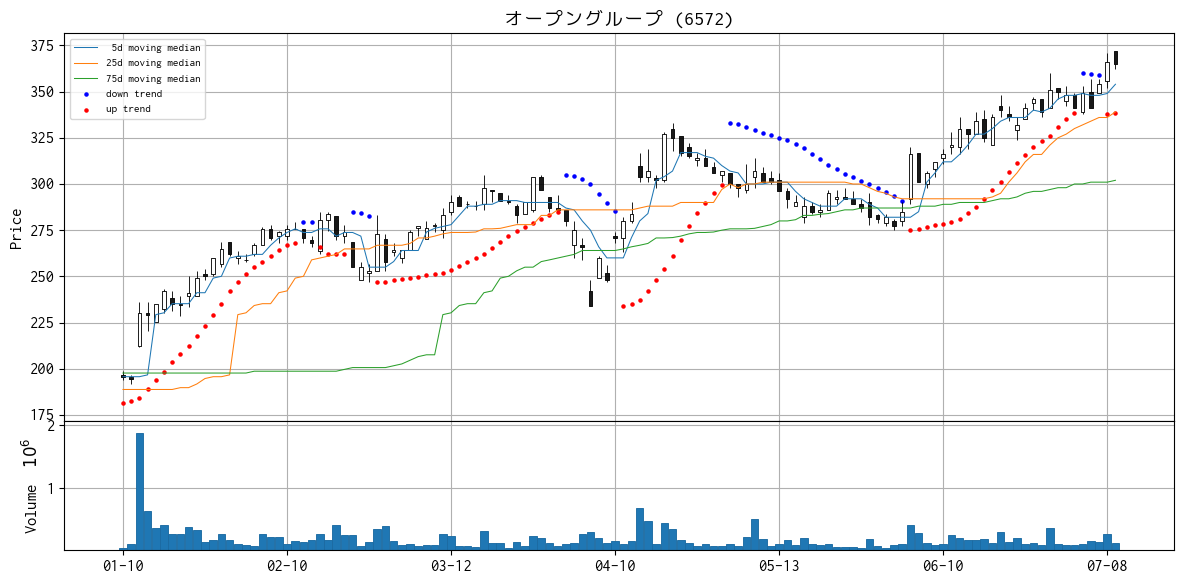

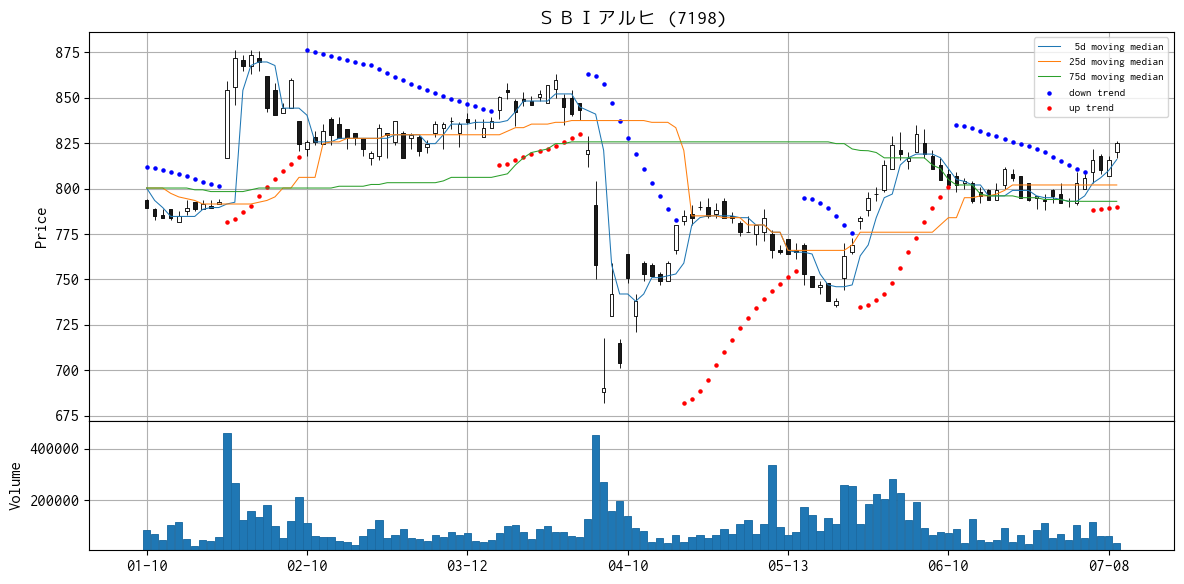

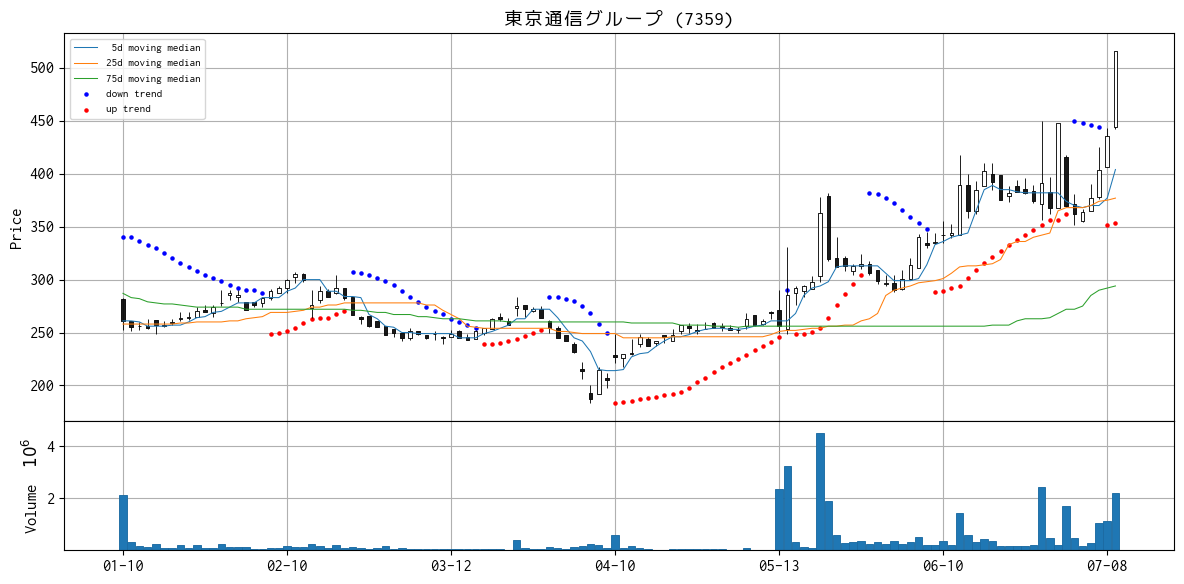

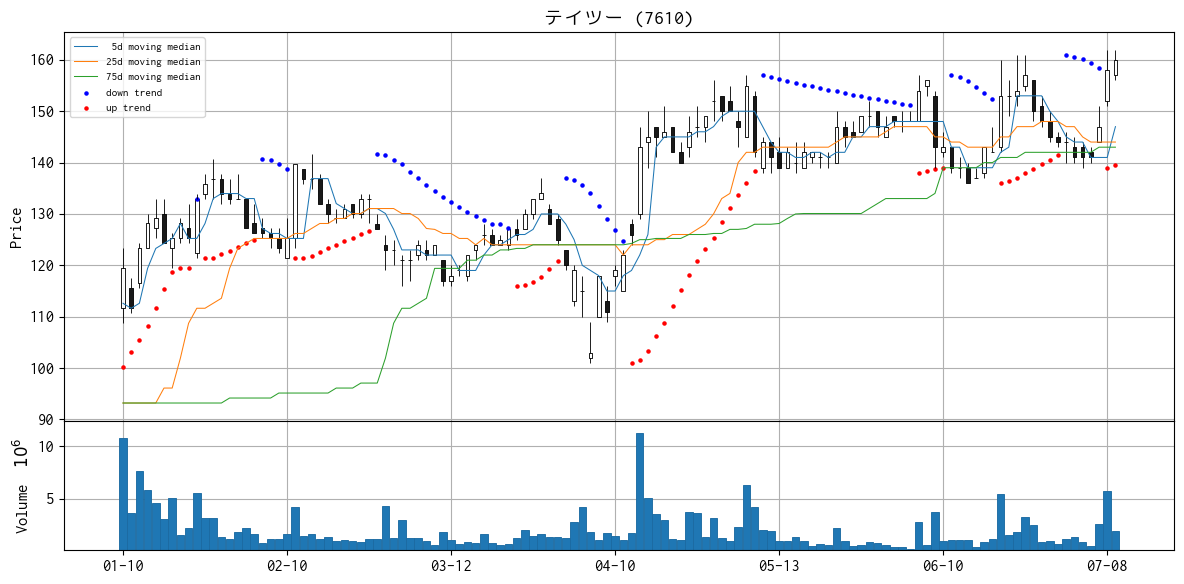

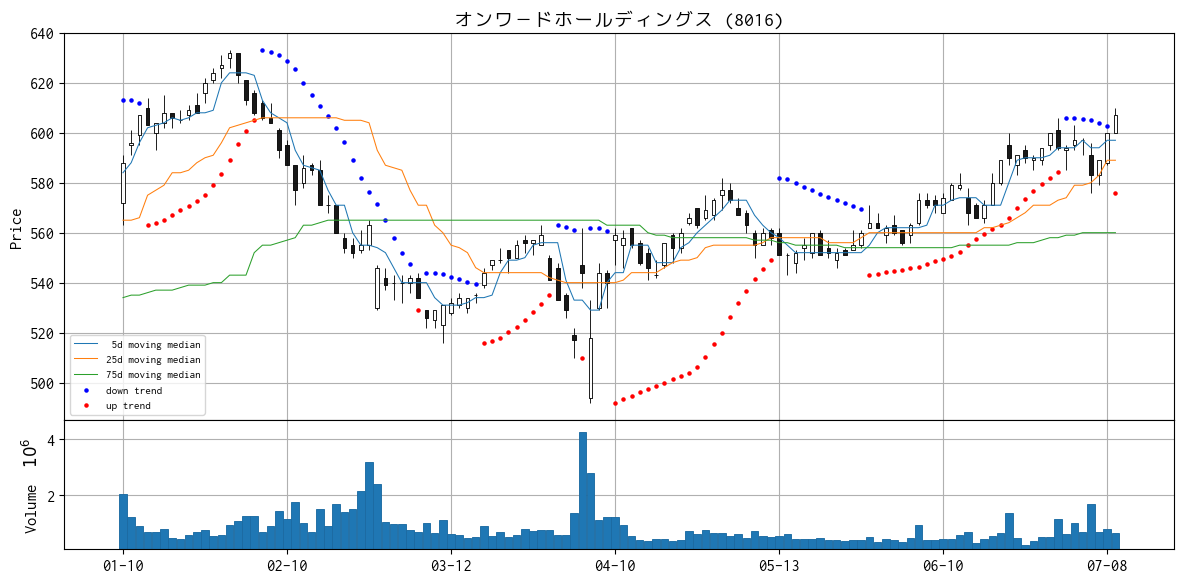

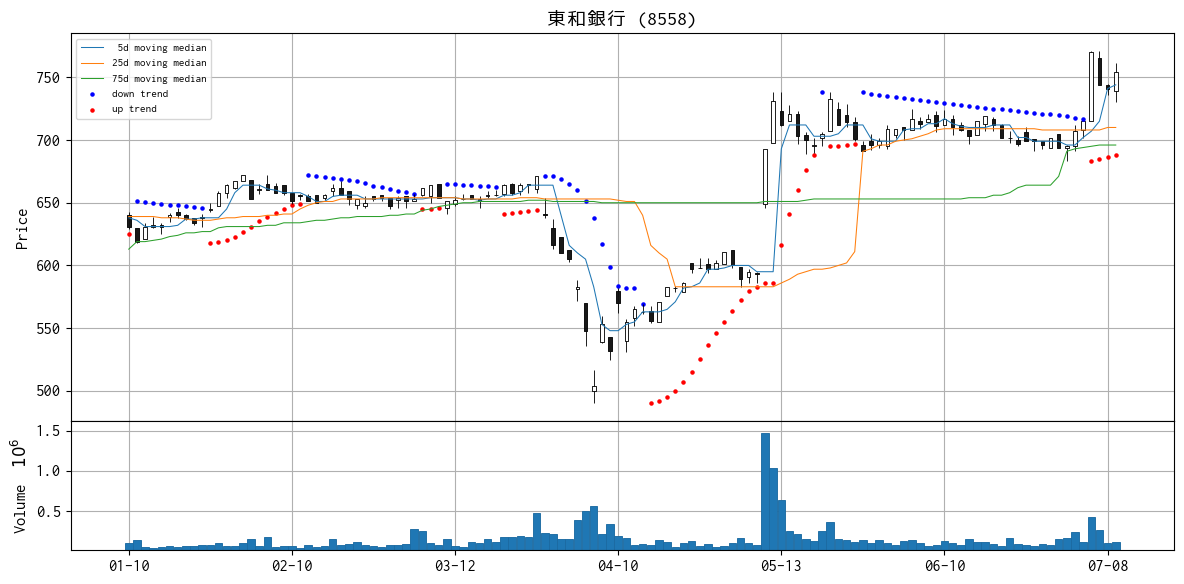

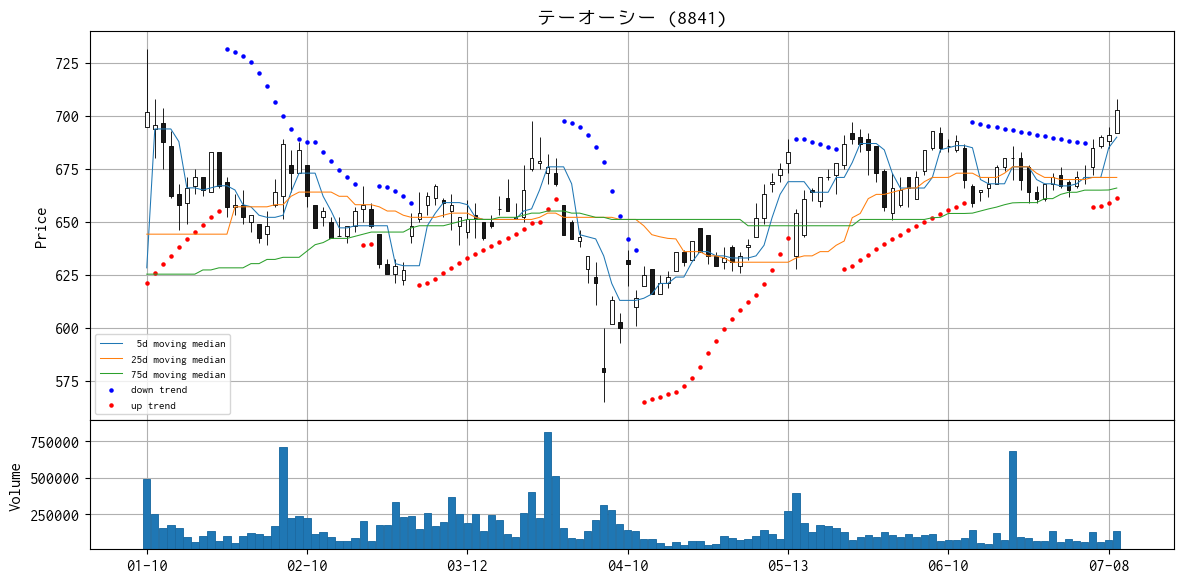

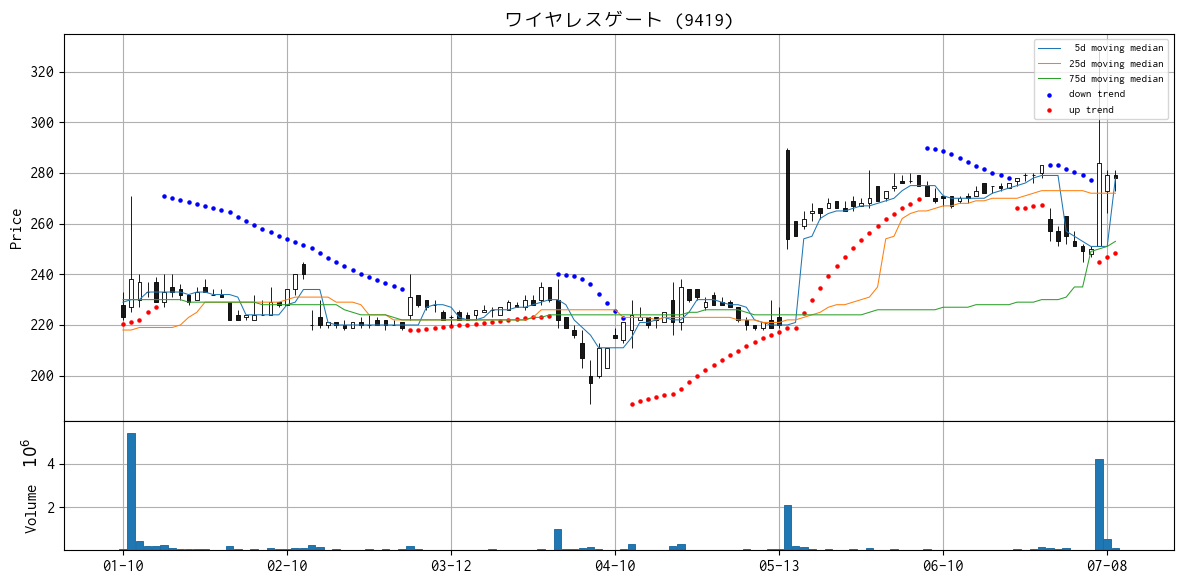

In [55]:
for r in range(len(df_portfolio)):
    code = df_portfolio.at[r, "銘柄コード "]
    if code == "--------":
        break
    name = df_portfolio.at[r, "銘柄名称"]
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df0 = ticker.history(period="3y", interval="1d")
    psar = ParabolicSAR()
    psar.calc(df0)

    # チャート
    dt_last = df0.index[len(df0) - 1]
    tdelta_1y = datetime.timedelta(days=180)
    df = df0[df0.index >= dt_last - tdelta_1y].copy()

    FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
    fm.fontManager.addfont(FONT_PATH)

    # FontPropertiesオブジェクト生成（名前の取得のため）
    font_prop = fm.FontProperties(fname=FONT_PATH)
    font_prop.get_name()

    plt.rcParams["font.family"] = font_prop.get_name()
    plt.rcParams["font.size"] = 12
    fig = plt.figure(figsize=(12, 6))
    ax = dict()
    n = 2
    gs = fig.add_gridspec(
        n, 1, wspace=0.0, hspace=0.0, height_ratios=[3 if i == 0 else 1 for i in range(n)]
    )
    for i, axis in enumerate(gs.subplots(sharex="col")):
        ax[i] = axis
        ax[i].grid()

    mm05 = df0["Close"].rolling(5).median()
    mm25 = df0["Close"].rolling(25).median()
    mm75 = df0["Close"].rolling(75).median()

    apds = [
        mpf.make_addplot(mm05[df.index], width=0.75, label=" 5d moving median", ax=ax[0]),
        mpf.make_addplot(mm25[df.index], width=0.75, label="25d moving median", ax=ax[0]),
        mpf.make_addplot(mm75[df.index], width=0.75, label="75d moving median", ax=ax[0]),
        mpf.make_addplot(df["Bear"], type="scatter", marker="o", markersize=5, color="blue", label="down trend", ax=ax[0]),
        mpf.make_addplot(df["Bull"], type="scatter", marker="o", markersize=5, color="red", label="up trend", ax=ax[0]),
    ]
    mpf.plot(df, type="candle", style="default", volume=ax[1], datetime_format="%m-%d", addplot=apds, xrotation=0, ax=ax[0])
    ax[0].set_title(f"{name} ({code})")
    ax[0].legend(loc="best", fontsize=8)

    plt.tight_layout()
    plt.show()
    plt.close()